What is the project?

- Predicting the type of Iris flower after training using machine learning algorithm.

Input:
    - Sepal length
    - Petal length
    - Sepal width
    - Petal width
    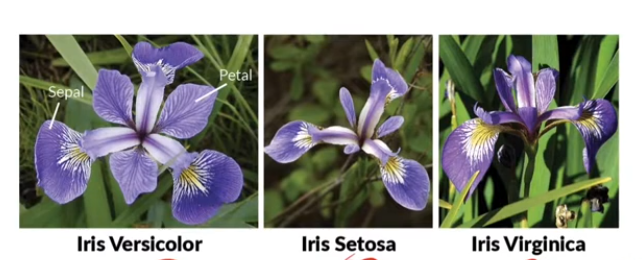


In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier


- Add a column iris.target -> the classification we are looking for
    0 = setosa
    1 = versicolor
    2 = virginica
- Check if any info is missing with .isnull().sum()

In [4]:
#convert iris into a dataframe
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df.info()

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


Each class has exactly 50 samples
Total = 150 samples

The dataset is perfectly balanced

In [5]:
df["target"].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

Lets plot the data and visualize it. 

df: DataFrame

hue="target": colors the points by class

diag_kind="kde": shows smooth curves on the diagonals instead of histograms

Things to look for: which features show clear separation/overlapping?


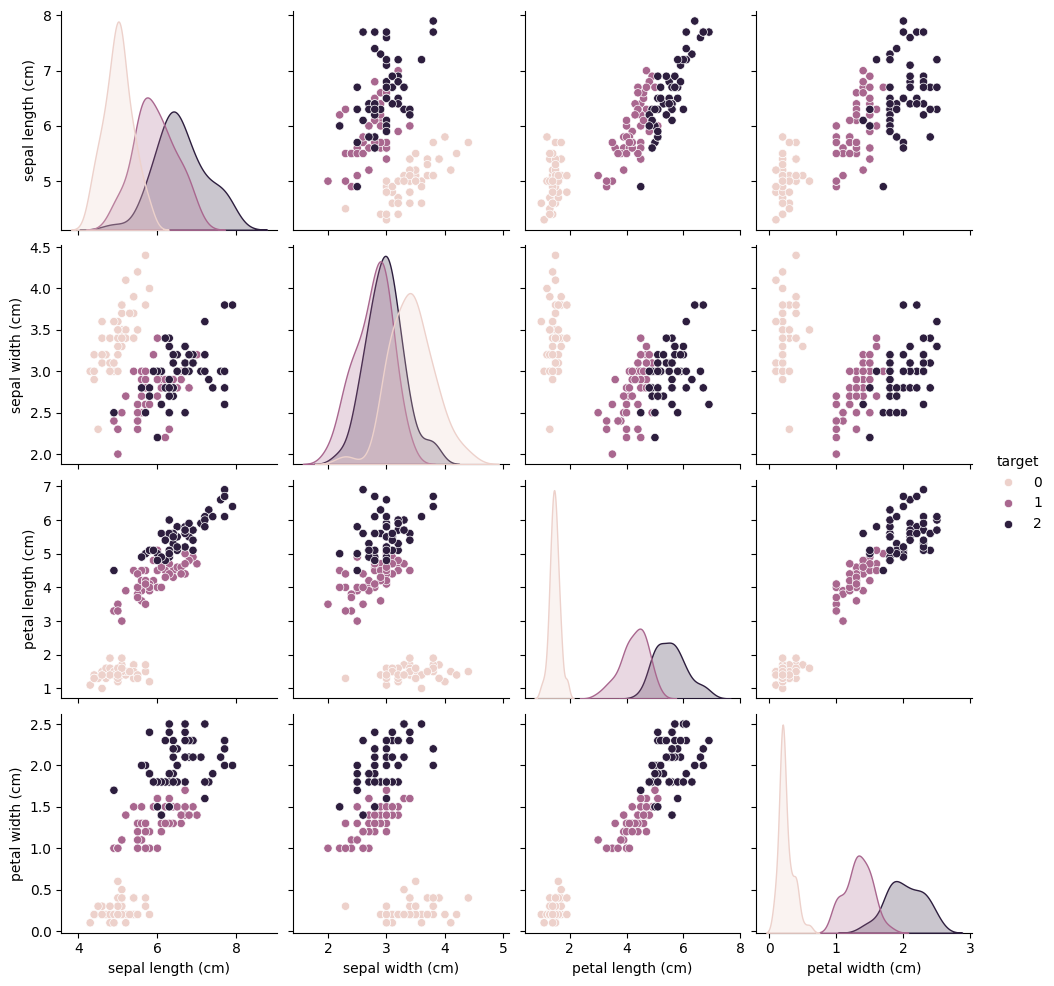

In [6]:
sns.pairplot(df, hue="target", diag_kind="kde")

Highlights from the Data

Class 0 (Setosa)
- Clearly separed with no overlap with the other categories
- Easiest to predict

Class 1 and 2 (Versicolor vs Virginica)
- Overlap with each other
- Sepal features are clustered
- Petals give the best separation - focus on this while training model

Model Selection: based on the task (classification) and the separation the best choice is Logistic Regression.

Features -> what we give the model to learn from
Target -> the classification we want

X = Features (without the target)
    - we drop the target column from df before feeding it to the model
y = target

test_size = 0.2 (80% for training, 20% for testing)
random_state = to maintain consistency. Same split every time
why 42? thats the meaning of the universe

In [7]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Using the Logistic Regression model we fit the data and check accuracy

In [8]:
#applying logistic regression
reg = linear_model.LogisticRegression(max_iter=10000, random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(f"Model accuracy: {metrics.accuracy_score(y_test, y_pred) * 100:.2f}%")



Model accuracy: 100.00%


Confusion Matrix shows every result was predicted correctly. Suspicious.. 

So lets try again, increasing the test size to 0.8
This should increase the difficulty for the model, specially on class 1 and 2, where there's more overlap 

In [17]:
X = df.drop("target", axis=1)
y = df["target"]

#bigger test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

#applying logistic regression
reg = linear_model.LogisticRegression(max_iter=10000, random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)


matrix = confusion_matrix(y_test, y_pred)
print(f"Model accuracy: {metrics.accuracy_score(y_test, y_pred) * 100:.2f}%")
print(matrix)

Model accuracy: 96.67%
[[43  0  0]
 [ 0 36  3]
 [ 0  1 37]]


In [9]:
print(confusion_matrix(y_test, y_pred))


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [11]:
def tune_model(X_train, y_train):
    param_grid = {
        "n_neighbors": range(1,21),
        "metric": ["euclidean","manhattan", "minkowski"],
        "weights": ["uniform", "distance"]
    }
    model = KNeighborsClassifier()
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    return grid_search.best_estimator_
best_model = tune_model(X_train, y_train)
print(best_model)

KNeighborsClassifier(metric='manhattan', n_neighbors=14)


Using the result of hyperparameter tuning we can fit the model to the best metrics
- KNeighborsClassifier(metric='manhattan', n_neighbors=14)

In [15]:
def evaluate_model(model, X_test, y_test):
    prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)

    matrix = confusion_matrix(y_test, prediction)

    return accuracy, matrix

accuracy, matrix = evaluate_model(best_model, X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Confusion matrix: ')
print(matrix)

Accuracy: 100.00%
Confusion matrix: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
